<a href="https://colab.research.google.com/github/codefinn9988/Ml_learn/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# CNN
#1. LeNet5 architecture using MNIST dataset
#2. AlexNet architecture using CIFAR-10 dataset

In [46]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


In [47]:
train_data =  datasets.MNIST(root="data",
                           train=True,
                           transform= ToTensor(),#transfrom pil image to tensor
                           target_transform=None,
                            download=True)
test_data =datasets.MNIST(root="data",
                           train=False,
                           transform= ToTensor(),
                            download=True)

train_data,test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [48]:
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [49]:
image.shape

torch.Size([1, 28, 28])

In [50]:
# .data = pixel values  .targets = label
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [51]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

Image shape: torch.Size([1, 28, 28])


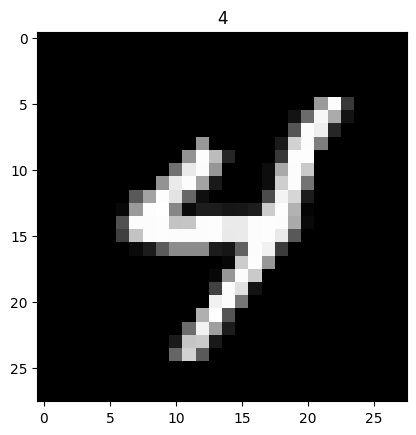

In [52]:
image, label = train_data[115]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(),cmap="gray")
plt.title(label);

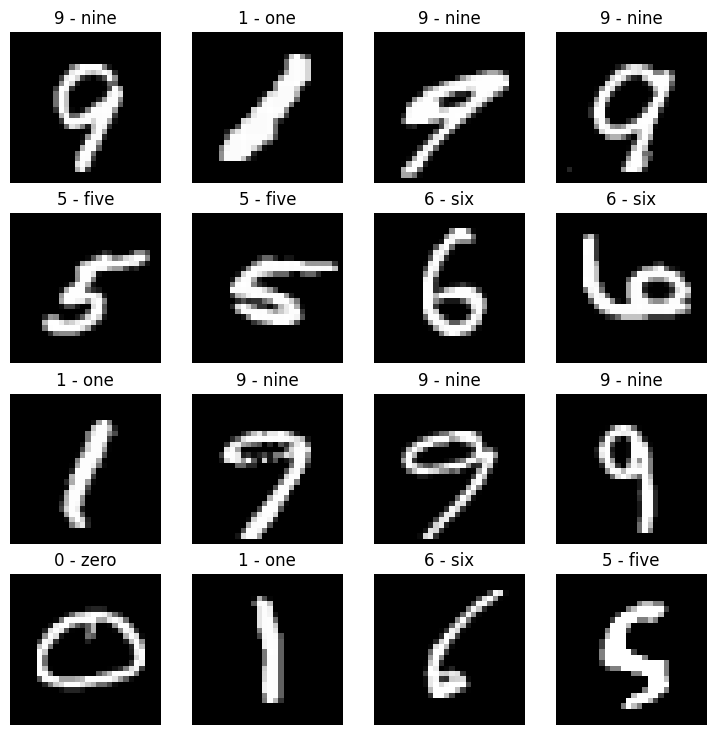

In [53]:
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols +1):
    random_idx = torch.randint(0,len(train_data),size =[1]).item()
    img,label =train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False); # no x-axis and y-axis


In [54]:
# DataLoader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data,batch_size=32,shuffle =True)
test_dataloader =DataLoader(test_data,batch_size=32,shuffle =True)


In [55]:
train_features ,train_labels =next(iter(train_dataloader))
train_features.size(),train_labels.size() #32 is a batch
#NCHW n->number of image c -> color channel 1(grayscale)

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [56]:
# Build the CNN Model
# Lets use  LeNet Architecture
# image(28*28) -> conv(5*5) pad=2 ->avg pool(2*2) stride=2
#  -> conv(5*5) ->avg pool(2*2) stride=2-> fC(fully connectd)(120)->
# FC(84) -> FC(10)
#


In [57]:
class LeNet5(nn.Module):
  def __init__(self,input_shape:int,hidden_unit:int,output_shape:int):
    super().__init__()
  # nn.Sequential = stack neural network layers in sequence.
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_unit,
                  kernel_size=5,
                  padding=2
                  ),
      # manual_Conv2d(in_channels=input_shape,
      #                              out_channels=hidden_unit,
      #                              kernel_size=5,
      #                              padding=2,
      #               stride=0),
        # padding preserves spatial dimensions.
        nn.ReLU(),
        #2*2
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    # After maxPool2d 28x28 -> 14x14.

    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=5
                  ),
        # manual_Conv2d(in_channels=hidden_unit,
        #               out_channels=hidden_unit,
        #               kernel_size=5,
        #               padding=0,
        #               stride=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )


    #  output_size = (W - kernel_size + 1) -> 14 - 5 + 1 = 10.
    # 10x10 -> 5x5.

    self.classifier = nn.Sequential(
        nn.Flatten(),
# Input features = (output channels from block_2) * (width * height after pooling)
        nn.Linear(in_features=hidden_unit*5*5,out_features=120),
        nn.ReLU(),
        nn.Linear(in_features=120,out_features=84),
        nn.ReLU(),
        nn.Linear(in_features=84,out_features=output_shape)

    )

  def forward(self,x:torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x= self.classifier(x)
    return x

torch.manual_seed(42)
model_0 = LeNet5(input_shape=1,
                 hidden_unit=10,
                 output_shape=len(class_names))
model_0

LeNet5(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=250, out_features=120, bias=True)
    (2): ReLU()
    (3): Linear(in_features=120, out_features=84, bias=True)
    (4): ReLU()
    (5): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [58]:
# Setup a loss function and optimizer
loss_fn = nn.CrossEntropyLoss() #  for Multi-Class Classification
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)


In [59]:
# Accuracy Function
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  # print(correct)
  acc = (correct/len(y_pred))*100
  return acc


In [60]:
# Functionizing training and test loops

def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn):

  train_loss, train_acc = 0,0
  for batch ,(X,y) in enumerate(data_loader):

    # 1. Forward pass
    y_pred = model(X)
    # 2. Calculate loss
    loss = loss_fn(y_pred,y)
    train_loss+=loss
    # argmax -> Returns the indices of the maximum value of all elements in the input tensor.
    train_acc+=accuracy_fn(y_true=y,
                           y_pred=y_pred.argmax(dim=1)) # convert raw logits to predicated class label

    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  # Calculate loss and accuracy per epoch and print out what's happening
  train_loss /=len(data_loader) # avg
  train_acc /=len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn):
  test_loss,test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      # 1. Forward pass
      test_pred = model_0(X)
      # 2. Calculate loss and accuracy
      loss = loss_fn(test_pred,y)
      test_loss +=loss
      test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    # Adjust metrics and print out
    test_loss /=len(data_loader) # avg
    test_acc /=len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")



In [42]:
# Training and testing
torch.manual_seed(42)

epochs = 3
for epoch in range(epochs):
  print(f"Epoch: {epoch}\n---------")
  train_step(model=model_0,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)
  test_step(model=model_0,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)



Epoch: 0
---------
Train loss: 1.54394 | Train accuracy: 47.70%
Test loss: 0.31237 | Test accuracy: 90.54%
Epoch: 1
---------
Train loss: 0.23190 | Train accuracy: 92.89%
Test loss: 0.15478 | Test accuracy: 95.19%
Epoch: 2
---------
Train loss: 0.13695 | Train accuracy: 95.75%
Test loss: 0.10200 | Test accuracy: 96.87%


In [43]:
# todo : manual convulotion layer
# https://github.com/detkov/Convolution-From-Scratch/blob/main/convolution.py


In [44]:
# todo : CIFAR-10 using AlexNet architecture.